Objective : using sklearn to create a classification model and predicting the type of flowers

In [4]:
# Reading the dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names) # Features
y = pd.Series(iris.target, name = 'species') # Target

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Making training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Making prediction model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicting
y_pred = clf.predict(X_test)

# Evaluating the accuracy 
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


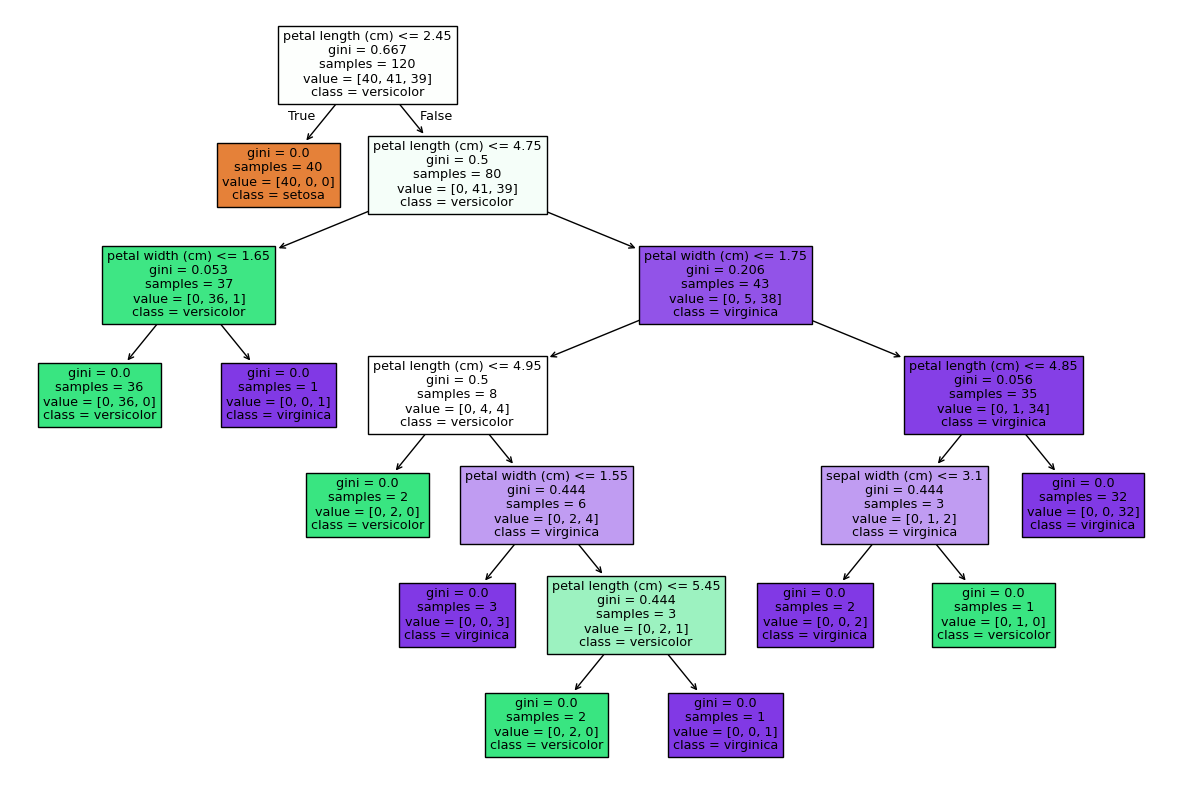

In [6]:
# Visualizing 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, filled = True)
plt.show()


=== max_depth = 1 ===
Accuracy: 0.6333333333333333


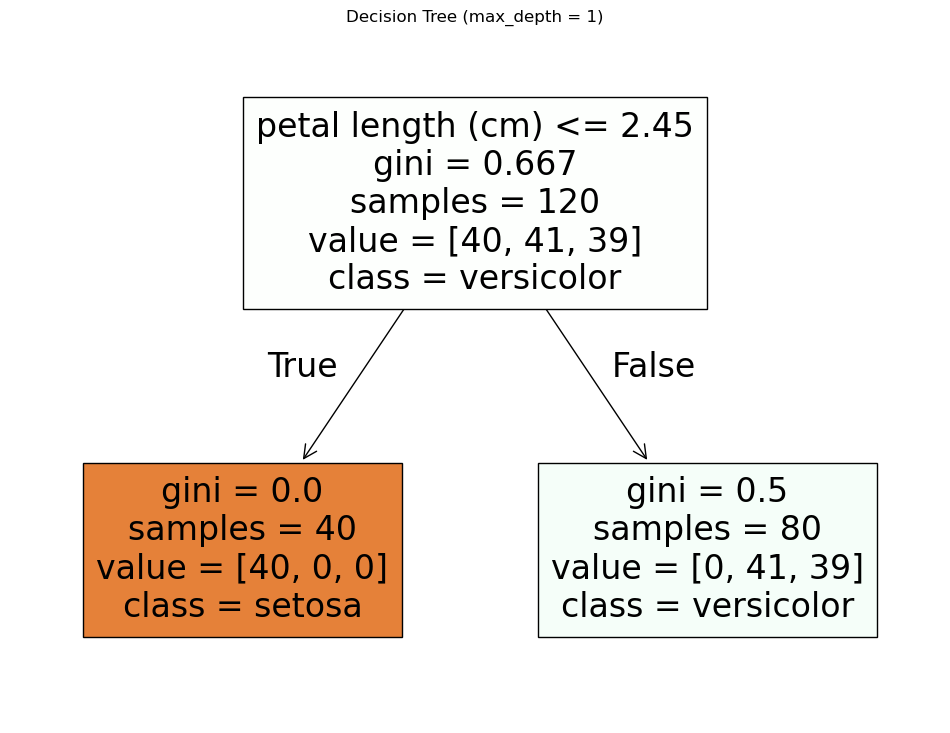


=== max_depth = 2 ===
Accuracy: 0.9666666666666667


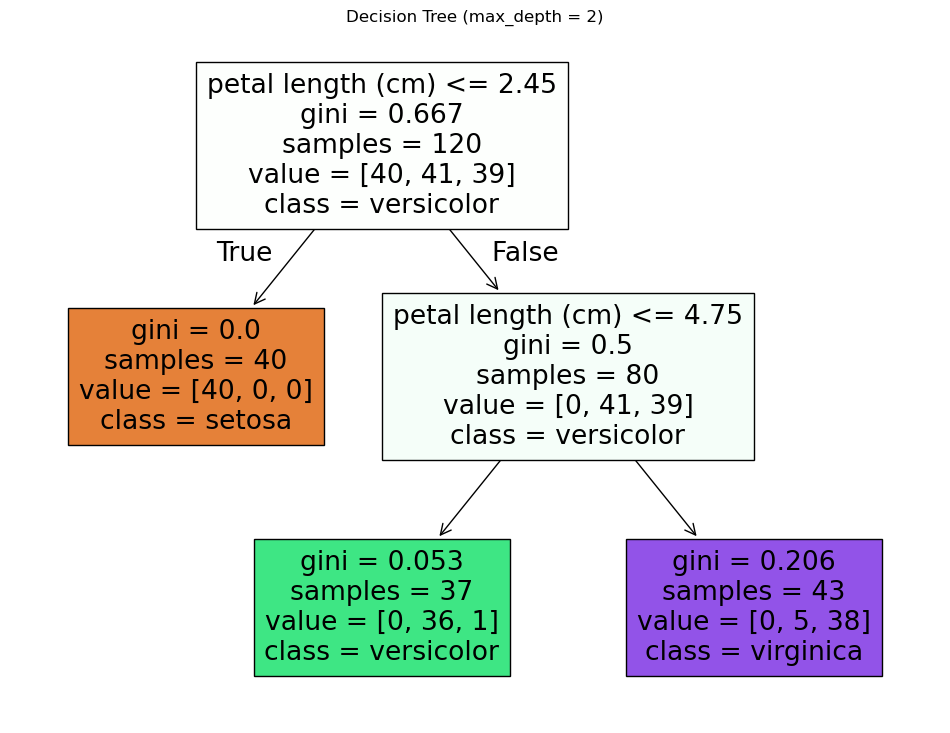


=== max_depth = 3 ===
Accuracy: 1.0


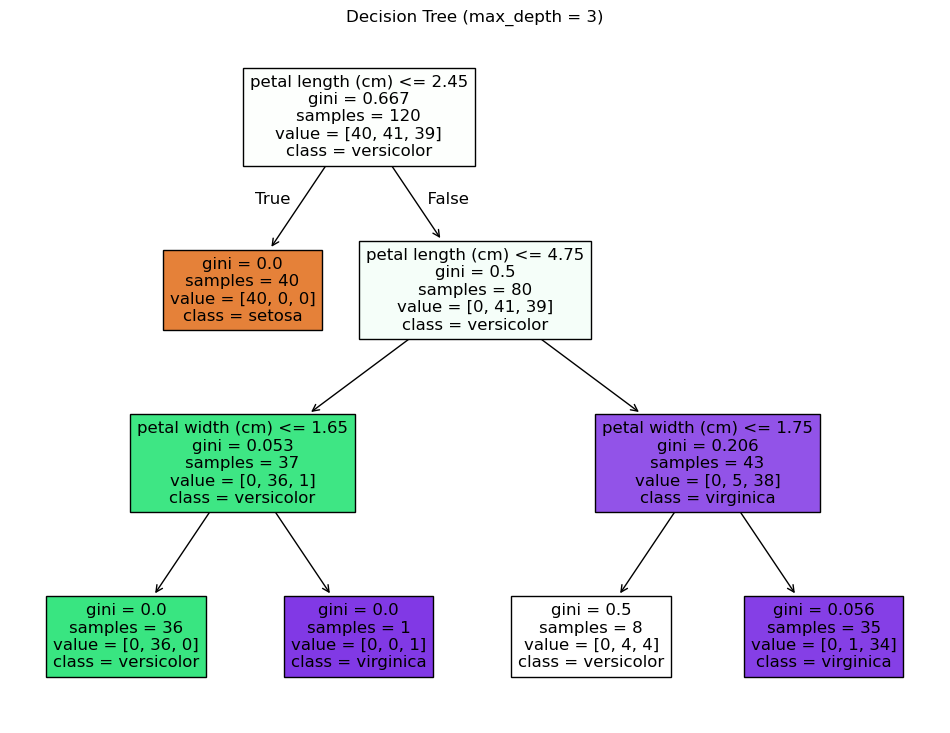


=== max_depth = None ===
Accuracy: 1.0


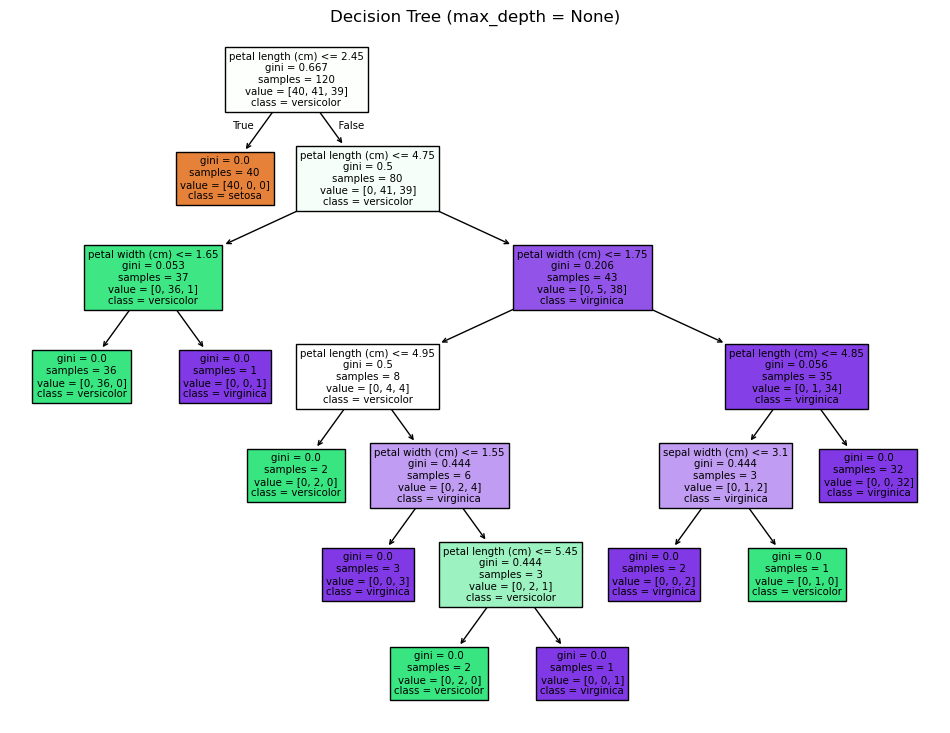

In [14]:
# Trying different maximum depth
for depth in [1, 2, 3, None]:  # None implies no limit on maximum depth
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n=== max_depth = {depth} ===")
    print("Accuracy:", acc)

    plt.figure(figsize=(12, 9))
    plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, filled = True)
    plt.title(f"Decision Tree (max_depth = {depth})")
    plt.show()

We tried different max_depth values to observe the balance between model simplicity and accuracy. While depth = 3 or more gives perfect accuracy, we noticed that depth = 2 already performs very well, indicating a simpler yet effective decision boundary.